Unsupervised Learning : Cluster nach Verkehrsaufkommen
                        #Ziel: Identifikation von Mustern im Verkehrsaufkommen.
                        #Features: Zählerdaten(fahrrad), Uhrzeit, Wochentag, Wetterdaten.
                        #Ergebnis: Cluster wie Rush Hour, Freizeitverkehr, wenig Verkehr.

In [1]:
import sys
import os

# Add the path to `database_scripts` folder
sys.path.append(os.path.abspath("../database_scripts"))
import  get_dataframe as gd
df_merged = gd.merge_dataframe()

Establish SQLite connection.


In [14]:
df_merged.head()

,Bezirk_ID,Zählstelle_ID,DateID,TimeID,Wert,temperature_2m (°C),relative_humidity_2m (%),rain (mm),snowfall (cm),cloud_cover (%),year,month,day,day_of_the_week,is_holiday,quarter,timeoftheday
0,0,3.0,1.0,0.0,4.0,11.2,71.0,0.0,0.0,57.0,2018.0,1.0,1.0,0,True,1.0,0.0
1,0,3.0,1.0,1.0,2.0,11.3,69.0,0.0,0.0,73.0,2018.0,1.0,1.0,0,True,1.0,0.0
2,0,3.0,1.0,2.0,14.0,11.7,64.0,0.0,0.0,90.0,2018.0,1.0,1.0,0,True,1.0,0.0
3,0,3.0,1.0,3.0,2.0,11.9,62.0,0.0,0.0,92.0,2018.0,1.0,1.0,0,True,1.0,0.0
4,0,3.0,1.0,4.0,3.0,11.7,63.0,0.0,0.0,92.0,2018.0,1.0,1.0,0,True,1.0,1.0


In [4]:
X = df_merged[['Wert','temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)', 'snowfall (cm)', 'cloud_cover (%)', 'year', 'month', 'day',
               'day_of_the_week', 'is_holiday', 'quarter', 'timeoftheday']]

In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC  # For classification; use SVR for regression
from sklearn import  metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [7]:
scalar =StandardScaler()


X_scaled = scalar.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

#df_pastpca = pd.DataFrame(pca.components_, columns= X.columns)

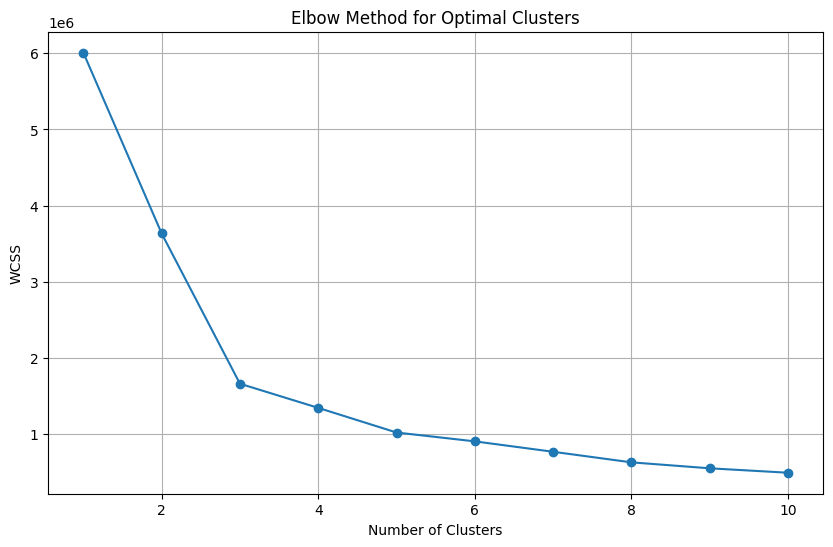

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine WCSS for different cluster sizes
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [9]:
km = KMeans(n_clusters=3)
cluster = km.fit_predict(x_pca)
cluster

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

<Axes: >

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


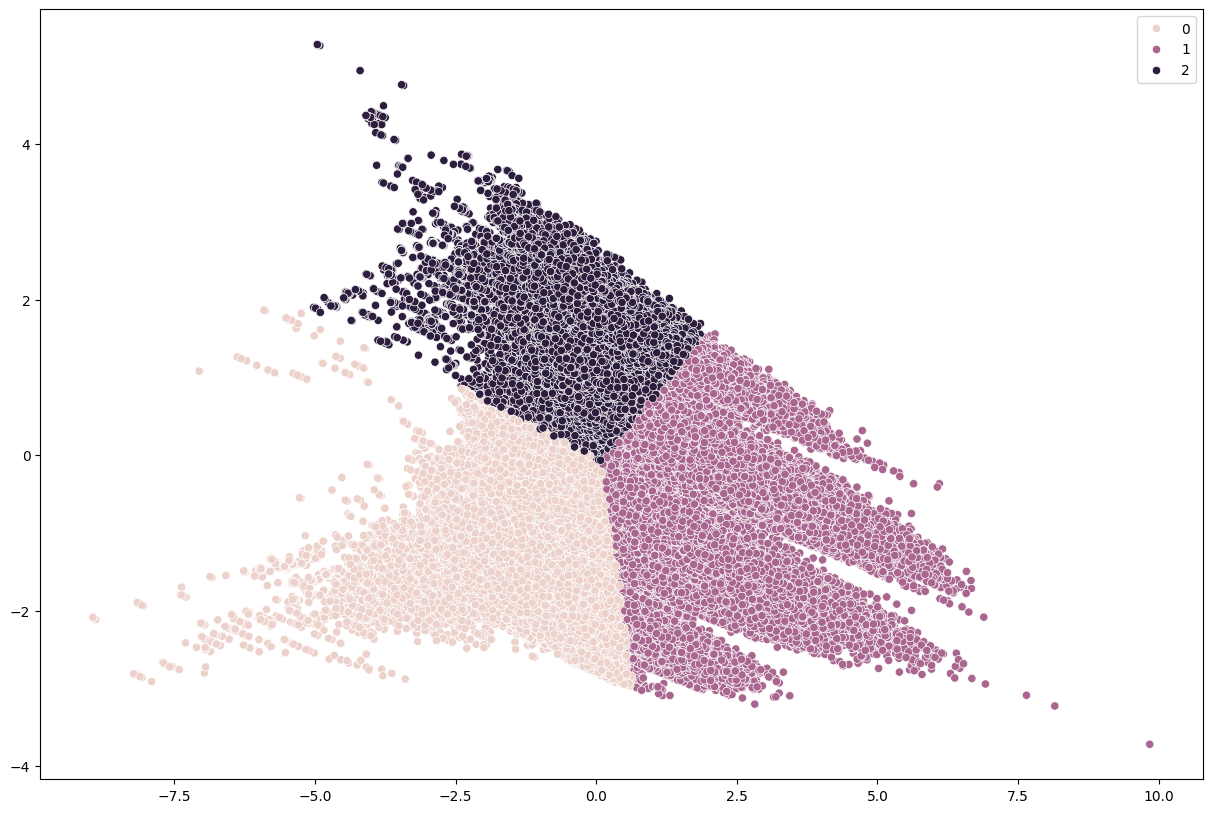

In [10]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(x = x_pca[ : , 0], y = x_pca[ : , 1], hue= cluster)

In [15]:
from sklearn.metrics import silhouette_score

# Berechnung des Silhouetten-Koeffizienten
silhouette_avg = silhouette_score(X_scaled, cluster)
print(f"Durchschnittlicher Silhouetten-Koeffizient: {silhouette_avg:.2f}")


KeyboardInterrupt: 

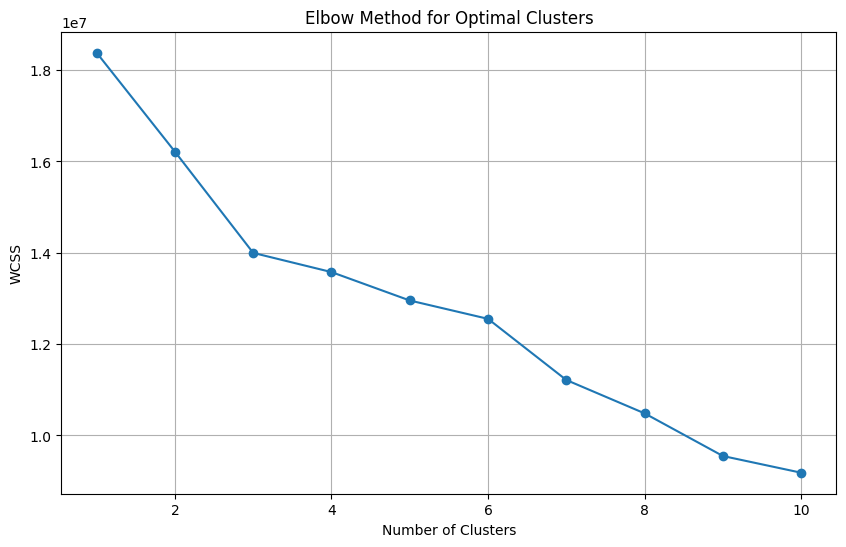

In [11]:
#ohne PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine WCSS for different cluster sizes
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()
